<a href="https://colab.research.google.com/github/TishaJhabak1014/Open-contributions/blob/master/TishaJhabak_ML/TishaJhabak_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




`Multivariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)



**Author**:
 Tisha Jhabak 

**Reach out**:
[Email](mailto:iamtisha22@gmaiul.com)



# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/ML LIVE SESSION/03_LinearRegression/student"

/content/drive/MyDrive/ML LIVE SESSION/03_LinearRegression/student


In [ ]:
!ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [ ]:
#importing important libraries
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras  
import os #using os commands between the python language


In [ ]:
#Loading the data frpm a csv file into a Dataframe
mathData = pd.read_csv('student-mat.csv', sep=';') 

In [ ]:
mathData.head(10) 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


# Exploratory Data Analysis


## Data Processing

In [ ]:
print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [ ]:
#convert the categories into numbers 

mathData['school'] = mathData['school'].apply({'GP':1, 'MS':0}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)

mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,1,no,no,4,3,2,1,2,5,4,6,10,10
5,1,0,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,0,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,6,6,5,6
8,1,0,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,1,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,0,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,5,1,1,1,5,0,14,15,15


In [ ]:
# Selecting the following columns/features from the data frame
mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [ ]:
mathData.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10


In [ ]:
mathData.to_csv('cleanedMathData.csv') 

In [ ]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


## Data Visualization

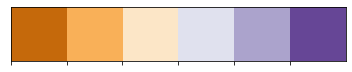

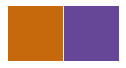

In [ ]:
# importing important libraries for data visualisation and setting up the palette
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) 
pal.as_hex() 

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors) 
sns.palplot(sns.color_palette(sns_colors)) 

In [ ]:
mathData.columns 

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

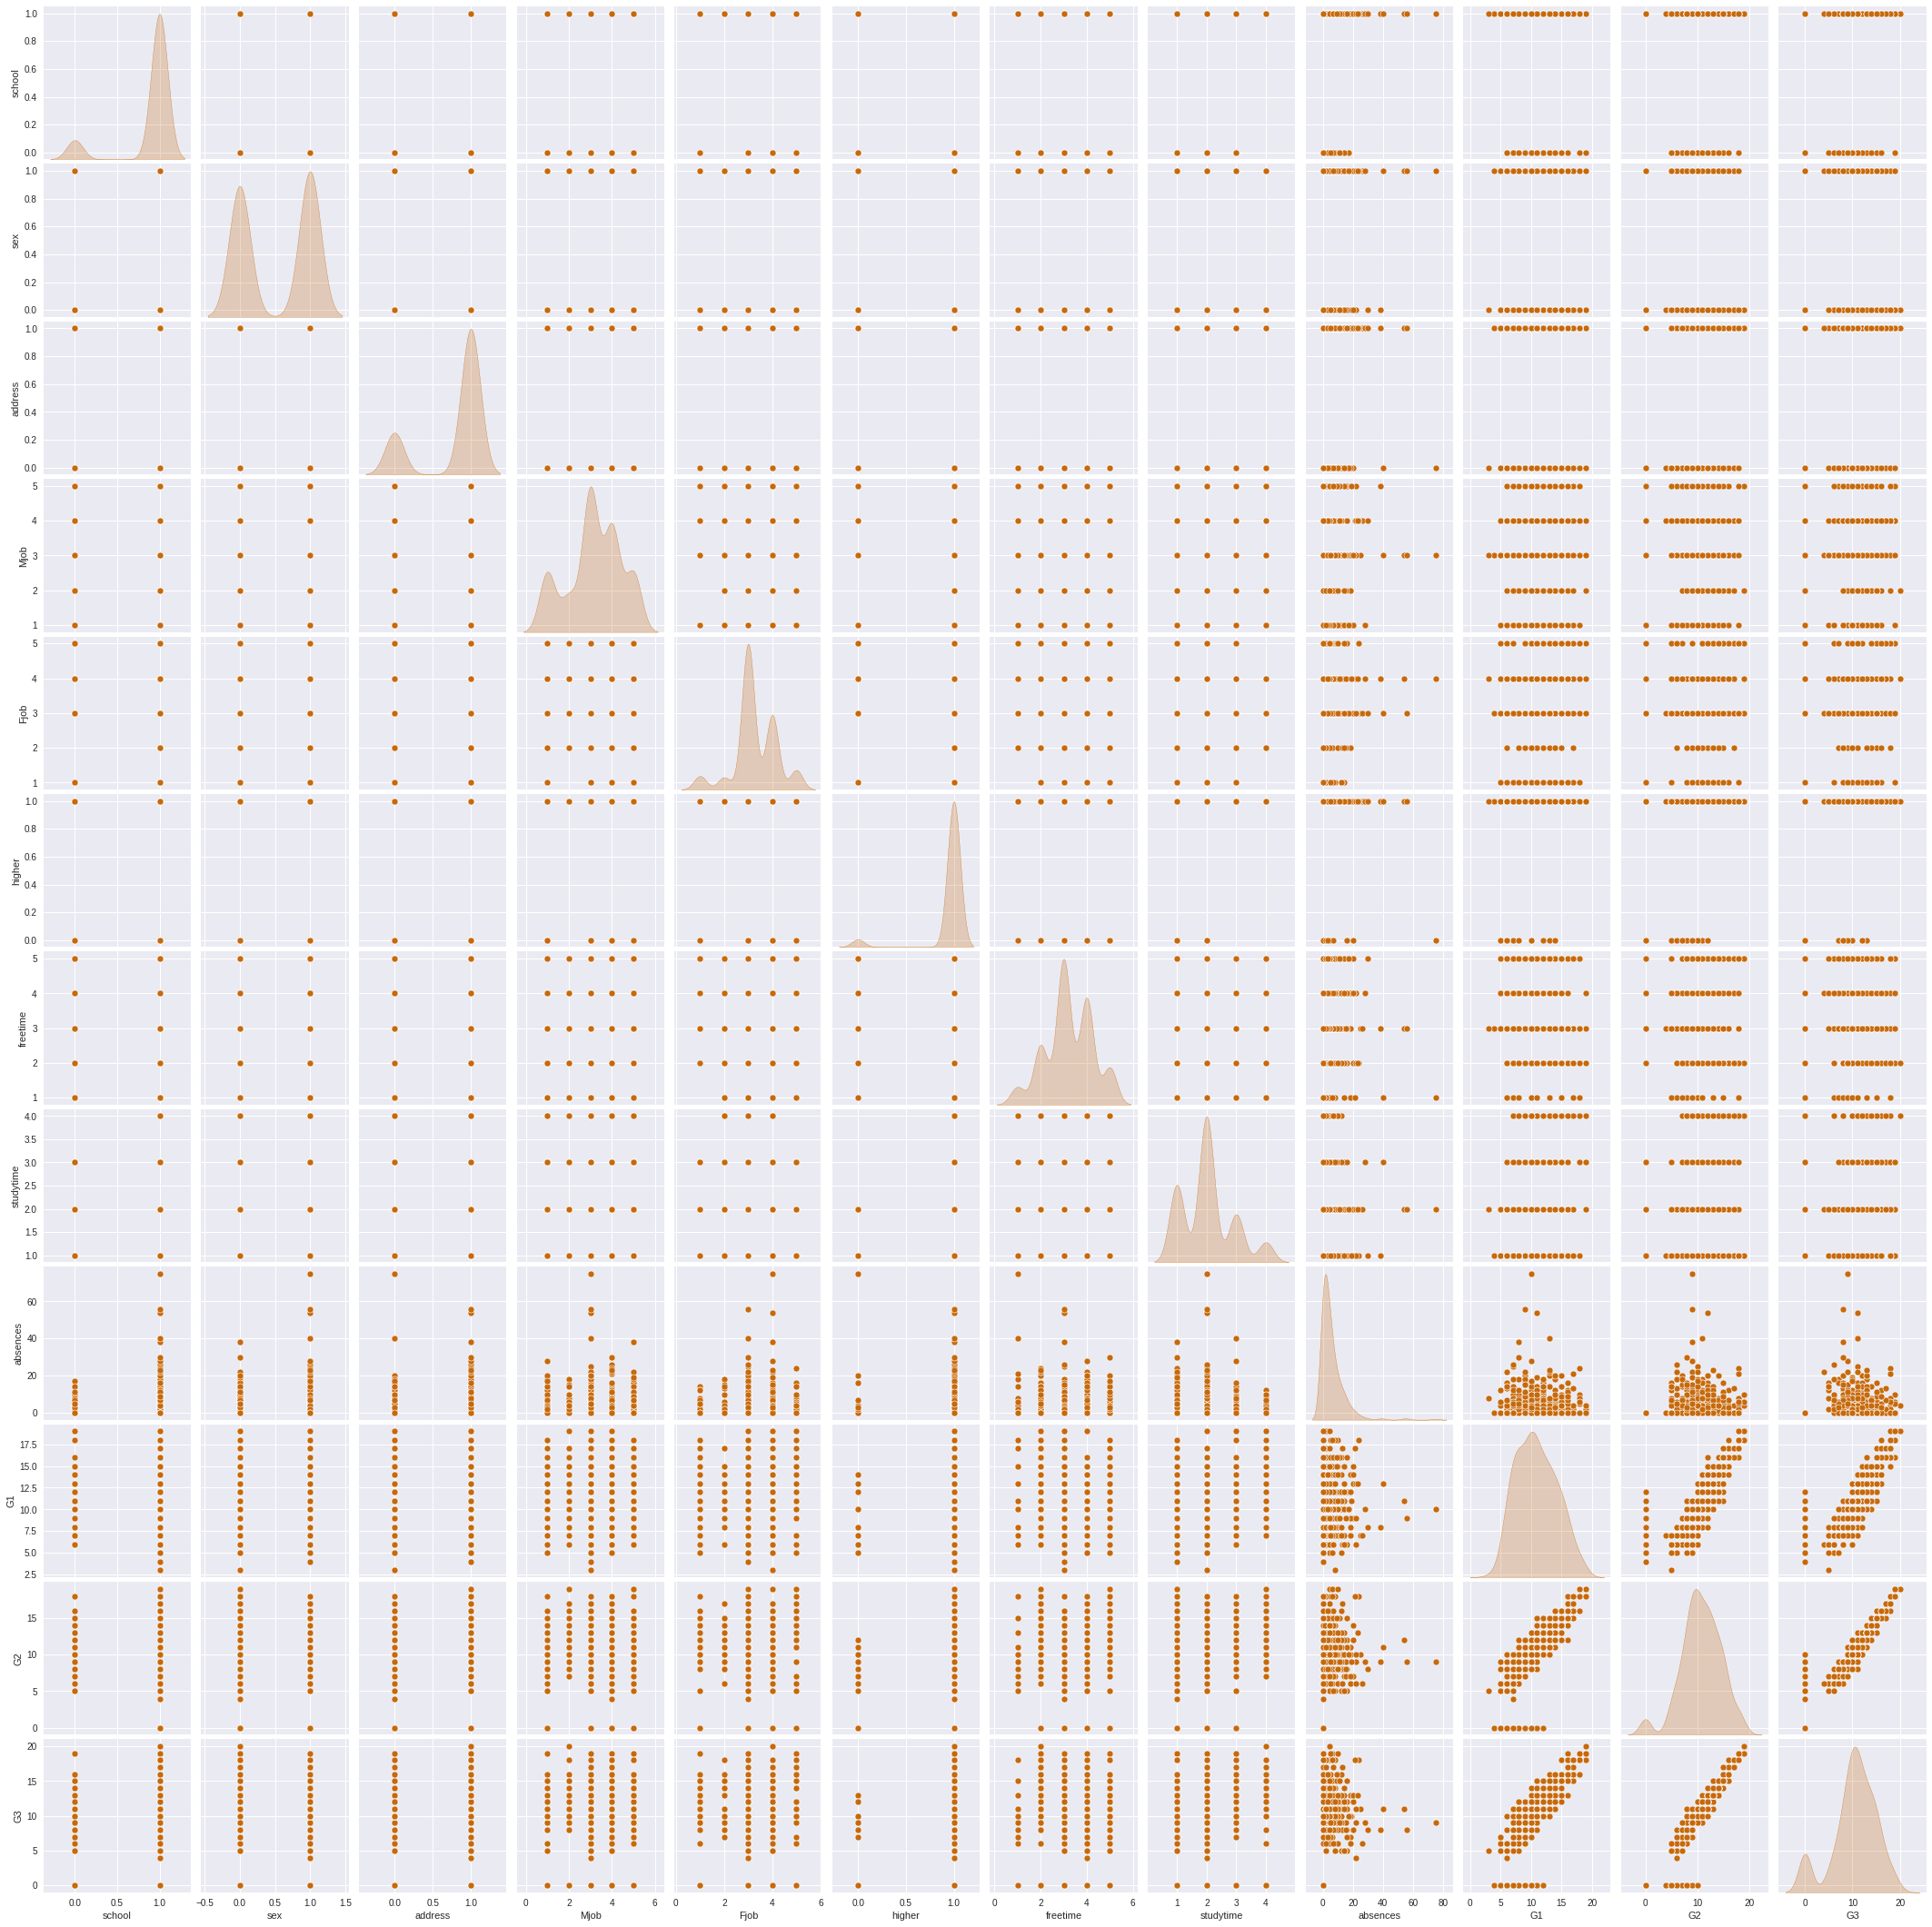

In [ ]:
sns.pairplot(mathData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

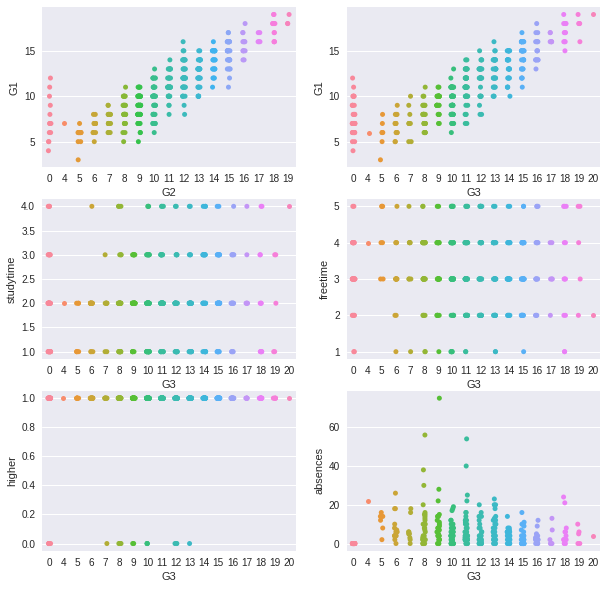

In [ ]:
fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=mathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=mathData, hue=None, ax=axarr[2][1])

# Data Splits

In [ ]:
trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       1    1        1     5     5  ...         3          3         4  14  14
318       1    1        0     1     4  ...         3          3         0  11  11
317       1    1        1     3     3  ...         3          3         9   9  10
65        1    1        1     5     4  ...         4          2         2  16  15
59        1    1        1     4     3  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        1    0        1     3     3  ...         5          2         0  14  15
25       1    1        1     4     4  ...         2          1        14   6   9
28       1    0        1     4     3  ...         3          2         4  11  11
31       1    0        1     4     4  ...         3          2         0  17  16
32       1    0        0     5     1  ...         5          2         0  17  16

# Developing the Modal

In [ ]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

8


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [ ]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

Epoch 1/2000
10/10 [==============================] - 1s 25ms/step - loss: 7.6284 - mae: 7.6284 - mse: 70.9220 - val_loss: 7.3691 - val_mae: 7.3691 - val_mse: 64.4392
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 6.4522 - mae: 6.4522 - mse: 50.7274 - val_loss: 6.0588 - val_mae: 6.0588 - val_mse: 43.8610
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 5.2942 - mae: 5.2942 - mse: 34.1268 - val_loss: 4.7372 - val_mae: 4.7372 - val_mse: 27.8638
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 4.1194 - mae: 4.1194 - mse: 21.6075 - val_loss: 3.4534 - val_mae: 3.4534 - val_mse: 16.5944
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 3.1167 - mae: 3.1167 - mse: 14.3604 - val_loss: 2.4865 - val_mae: 2.4865 - val_mse: 10.9409
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 2.4727 - mae: 2.4727 - mse: 11.5724 - val_loss: 2.1815 - val_mae: 2.1815 - val_mse: 9.8999
Epoc

# Inferences

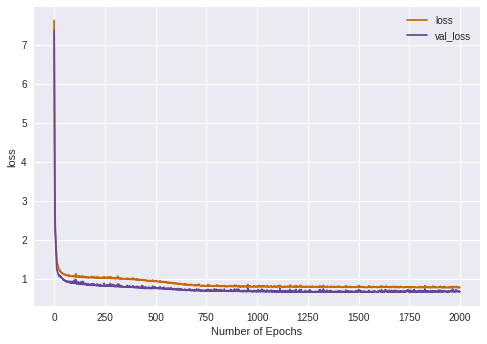

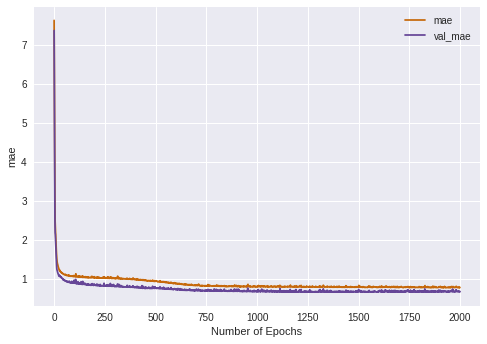

In [ ]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [ ]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[14.948356    8.869314   11.061589   16.11081    15.625399   12.096107
 13.087081   18.092592   19.099434    9.971005   15.04163    15.0493965
  6.0409346   6.0300922  10.022884   14.02901    10.052636   17.011131
  9.013211   11.013665   15.044553   14.044538   13.087148   14.123744
  7.871603   -0.07061357  0.20325547 11.043929   13.015075   10.076728
 11.03811    11.101396   11.015191    5.090255    8.791667   12.012225
  7.9998693   9.012195   15.02096     9.04758     9.042943    6.0200787
 12.020206   -0.05761308 12.095014    0.07949524  9.982085   11.048541
 12.135777   17.066807   10.09734    13.353052    8.940913   10.142623
 14.084943   11.050309   15.079306   12.026845   13.10663     9.06862
 13.989066    4.998765   15.027553    5.185761   15.065668   12.002469
 15.068304   15.027763    7.0520396   7.065287   12.0134     16.118298
 11.794263   14.924801   10.077649    2.8863347   9.990801    5.9595814
 12.033462  ]


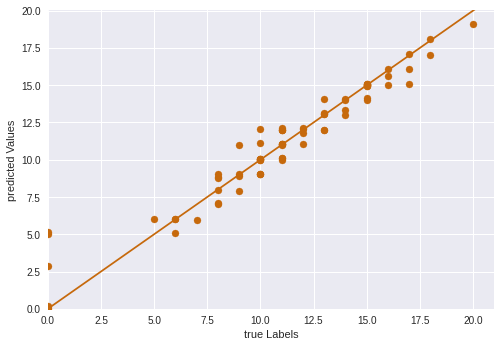

In [ ]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

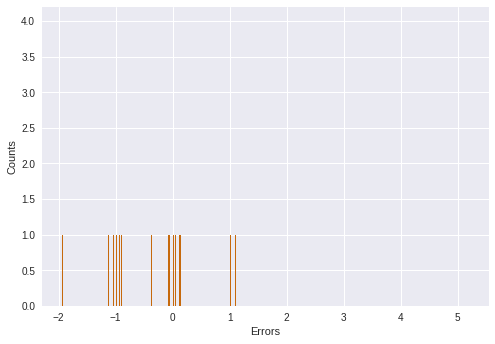

In [ ]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

# Saving the Model

In [ ]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [ ]:
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
